# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Tag the commit as *Final submission of Assignment 2*
- Submit through GitHub
- Provide your GitHub url to the Ipython notebook as the submisison for Brightspace assignment 2
- Post (interesting) errors in the course Github's issue page

# Assignment Intro

In this assignment, you will be asked to implement some functionalities on the dataset that you worked with in the first assignment.

### DEADLINE FOR THIS ASSIGNMENT IS 01 OCTOBER 2021 BEFORE 23:59

<hr />

## Import libraries
Update this list as you go along the assigment

In [1]:
# YOUR CODE HERE
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import html5lib
from scipy.signal import find_peaks
import datetime

## Preparing data

### 1. Read 2020 and 2021 data for your selected country. You only need provincial data for this assignment. Print the first 5 lines of data

In [2]:
# YOUR CODE HERE
file_path='C:/Users/TUDelft/TIL6010/Region_Mobility_Report_CSVs/2020_NL_Region_Mobility_Report.csv'
f=open(file_path)
df_2020=pd.read_csv(f)
yy='/2021'
cc='/NL'
fs='http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data'+yy+cc
df_2021=pd.read_csv(fs,sep=',',header='infer')
df=pd.merge(df_2020,df_2021,how='outer')
#same code from assignment 1,Y2020 from local, Y2021 from Internet


### 2. For this assignment, select and extract the data for a single province. Name the dataframe for this subset `df_province_selected`

In [3]:
# YOUR CODE HERE
df_U=df[df['sub_region_1']=='Utrecht']#data of province Utrecht
print(df_U.head())

      country_region_code country_region sub_region_1 sub_region_2  \
98786                  NL    Netherlands      Utrecht          NaN   
98787                  NL    Netherlands      Utrecht          NaN   
98788                  NL    Netherlands      Utrecht          NaN   
98789                  NL    Netherlands      Utrecht          NaN   
98790                  NL    Netherlands      Utrecht          NaN   

       metro_area iso_3166_2_code  census_fips_code  \
98786         NaN           NL-UT               NaN   
98787         NaN           NL-UT               NaN   
98788         NaN           NL-UT               NaN   
98789         NaN           NL-UT               NaN   
98790         NaN           NL-UT               NaN   

                          place_id        date  \
98786  ChIJPzM8M01oxkcRsFwejVreAAM  2020-02-15   
98787  ChIJPzM8M01oxkcRsFwejVreAAM  2020-02-16   
98788  ChIJPzM8M01oxkcRsFwejVreAAM  2020-02-17   
98789  ChIJPzM8M01oxkcRsFwejVreAAM  2020-02-18  

The following show an example from extracting the data for South Holland, the Netherlands

In [4]:
#df_province_selected.head()

### 3. Aggregated measurements

#### Write a function with the following arguments as the input:
- a dataset as a dataframe object
- list of attributes (refers to df.columns)
- a year
- one of the following statistic measurements: mean/median/max/min. You can use [enum](https://docs.python.org/3/library/enum.html) for this argument.
  
The function will then return the required statistic on some attributes of the data for a particular year.

In [5]:
# modify the following line to make the function calculate the 'mean' when the statistic argument is empty.
def calculate_statistic(data, attributes, year, statistic):
    """calculate a statistic

    Args:
        data (Pandas DataFrame): dataset
        attributes (list): list of attributes
        year (int): either 2020 or 2021
        statistic (str): the statistic to calculate: mean/median/max/min
    """
    # YOUR CODE HERE
    data['strdate']=str(data['date'])
    df_t=data[data['strdate'].str.contains(year)]
            #select year
    
    res_dict={}
    F='Incorrect statistic'
    if statistic=='mean' or statistic=='':#select a function, or show error
        for attr in attributes:
            req=df_t[attr].mean()
            res_dict[attr+' '+statistic]=req
    elif statistic=='median' :
        for attr in attributes:
            req=df_t[attr].median()
            res_dict[attr]=req
    elif statistic=='max' :
        for attr in attributes:
            req=df_t[attr].max()
            res_dict[attr]=req
    elif statistic=='min' :
        for attr in attributes:
            req=df_t[attr].min()
            res_dict[attr]=req
    else: return F
    return res_dict
    pass


#### Call your calculate_statistic function and print the results with three different input arguments

In [6]:
# YOUR CODE HERE
r=calculate_statistic(df_U, ['residential_percent_change_from_baseline'], '2020','mean')
print(r)

{'residential_percent_change_from_baseline mean': 10.413056594666346}


<ipython-input-5-40c4f1edf850>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strdate']=str(data['date'])


## Activity changes

Since there are quite some noises when looking at daily data, it is easier to observe data on a larger aggregation level. The following code derives 7-day averages for the provice data. We also prepare a plot to visualise it for you.

In [7]:
df_U['date']=pd.to_datetime(df_U['date'])
df_province_agg = df_U.resample('7D', on='date').mean()#7-day average
df_province_agg.reset_index(inplace=True)
df_province_agg.head()

<ipython-input-7-4defa005ec9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_U['date']=pd.to_datetime(df_U['date'])


,date,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,NaN,NaN,2.955752,1.622807,-1.121212,-0.900000,-0.510067,0.206186
1,2020-02-22,NaN,NaN,2.765217,-2.789474,-19.428571,-13.829060,-19.013423,2.462366
2,2020-02-29,NaN,NaN,1.228070,2.535088,-1.906250,-2.171171,1.054054,0.357143
3,2020-03-07,NaN,NaN,-0.198198,8.224138,0.187500,-7.963636,-2.463087,2.381443
4,2020-03-14,NaN,NaN,-23.711538,11.626087,6.285714,-48.702479,-41.225166,16.974359


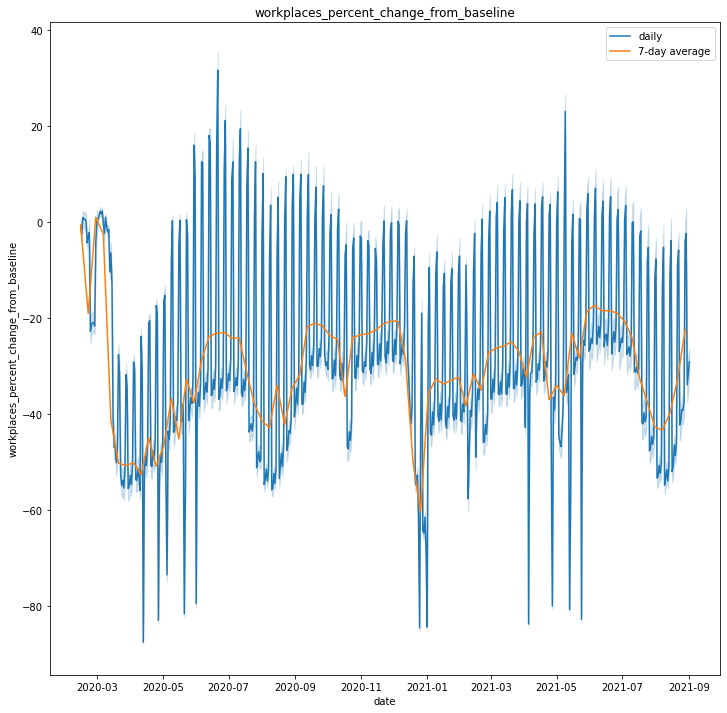

In [8]:
#Code to visualise the raw data and sampled data
fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('workplaces_percent_change_from_baseline')
sns.lineplot(x='date', y='workplaces_percent_change_from_baseline', data=df_U, label='daily', ax=ax)
sns.lineplot(data=df_province_agg, x='date', y='workplaces_percent_change_from_baseline', label='7-day average', ax=ax)
plt.show()#plots for selected data

## Identifying peaks

Let's focus on the 7-day averaged data. This averaged time series data shows how many times workplace changes reach peaks. Your task is to identify these moments. 

### 4. Identify peaks with personal code

Complete the function below. Your function should return (at least) a list of indexes where there are peaks in data.

In [9]:
def my_find_peaks(data, activity): #,**kwargs):maybe kwargs are not necessary
    """[summary]

    Args:
        data (dataframe): dataframe with at least two attribute columns: date and the given activity
        activity (str): one of the (six) available mobility activities
        kwargs: a dictionary of arguments. Use these to customise your function on finding peaks
    """
    peak_list=[]
    for i in range(1,len(data[activity])-1):
        if data[activity][i]>data[activity][i-1] and data[activity][i]>data[activity][i+1]:
            peak_list.append(i)
    return peak_list#a peak is just one value larger than both values before and after it 
    

In [10]:
activity = 'workplaces_percent_change_from_baseline'
max_ind = my_find_peaks(df_province_agg, activity)
max_ind#looking for peaks' position

[2, 7, 9, 12, 14, 19, 26, 31, 42, 47, 50, 52, 57, 61, 63, 65, 68, 70]

In [11]:
# Assign the data related to the max_ind to df_max
df_max_dates=[]
df_max=[]
for i in range(len(df_province_agg[activity])):#get dates accordong to positions of peaks
    if i in max_ind:
        df_max_dates.append(df_province_agg['date'][i])
        df_max.append(df_province_agg[activity][i])
print(df_max_dates)
df_datamax=pd.DataFrame({'date':df_max_dates,activity:df_max})#a new dataframe only including max dates and refer value
    #activity set in 4.2

[Timestamp('2020-02-29 00:00:00'), Timestamp('2020-04-04 00:00:00'), Timestamp('2020-04-18 00:00:00'), Timestamp('2020-05-09 00:00:00'), Timestamp('2020-05-23 00:00:00'), Timestamp('2020-06-27 00:00:00'), Timestamp('2020-08-15 00:00:00'), Timestamp('2020-09-19 00:00:00'), Timestamp('2020-12-05 00:00:00'), Timestamp('2021-01-09 00:00:00'), Timestamp('2021-01-30 00:00:00'), Timestamp('2021-02-13 00:00:00'), Timestamp('2021-03-20 00:00:00'), Timestamp('2021-04-17 00:00:00'), Timestamp('2021-05-01 00:00:00'), Timestamp('2021-05-15 00:00:00'), Timestamp('2021-06-05 00:00:00'), Timestamp('2021-06-19 00:00:00')]


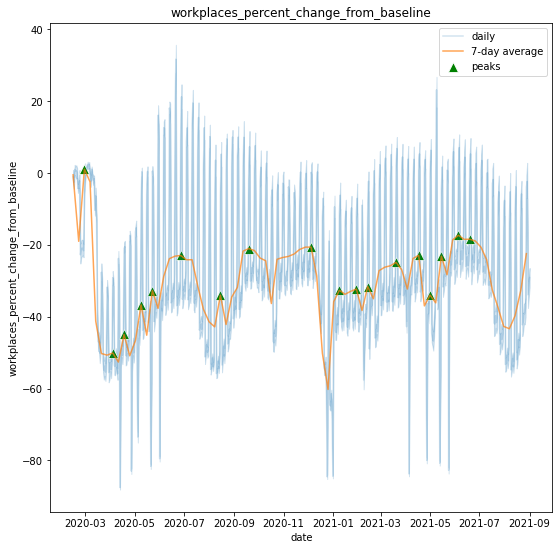

In [12]:
#Code to visualise the raw data, sampled data and the peaks
# create a figure and an axis to plot
fig, ax = plt.subplots(figsize=(9,9))
# set the title of the plot
ax.set_title(activity)
# plot the daily values
sns.lineplot(x='date', y=activity, data=df_U, label='daily', ax=ax, alpha=0.2)
# plot the 7-day average
sns.lineplot(data=df_province_agg, x='date', y=activity, label='7-day average', ax=ax, alpha=0.7)
# label the peaks
sns.scatterplot(x=df_datamax['date'], y=df_datamax[activity], data=df_datamax, label='peaks', ax=ax, marker='^', color='g', s=100)
plt.show()

### 5. Identify peaks using library scipy - [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

In [13]:
# YOUR CODE HERE
def fpv_data(data,act,pv):
    if pv=='peak':
        peaks,_=find_peaks(data[act])
    if pv=='valley':
        data['act_minus']=data[act]*(-1)
        peaks,_=find_peaks(data['act_minus'])
    peak=peaks.tolist()
    return(peak)
#scipy find peaks function, find valleys=find peaks for MINUS values, function can be selected


### 6. Identify valleys

You have identified the peaks in the data above using both your personal approach and the scipy library. Here, you can also identify the valleys (or troughs) using either of these approaches.

In [125]:
# The CODE is UP THERE, combined with identifying peaks


### 7. Identify all the peaks (and potentially valleys) for all the activities in the data. Print out the peaks for each of the activities. 

If you are brave, you can make use of the plotting piece of code that is provided above to plot the results.

[6, 8, 12, 20, 26, 36, 39, 45, 48, 51, 54, 59, 65, 70, 73, 76, 78]
[1, 6, 8, 15, 20, 26, 33, 35, 37, 39, 42, 45, 48, 51, 55, 59, 64, 66, 71, 76]
[1, 6, 8, 10, 12, 14, 16, 20, 23, 27, 33, 36, 39, 42, 45, 48, 52, 56, 59, 63, 66, 71, 73, 76, 78]
[1, 6, 8, 10, 16, 20, 25, 27, 35, 37, 39, 45, 48, 51, 55, 59, 62, 66, 70, 76]
[1, 6, 8, 10, 13, 15, 25, 27, 35, 45, 48, 51, 53, 59, 62, 64, 66, 69, 77]
[2, 9, 18, 22, 24, 26, 30, 36, 40, 48, 50, 54, 58, 61, 63, 65, 69, 71, 74, 77]


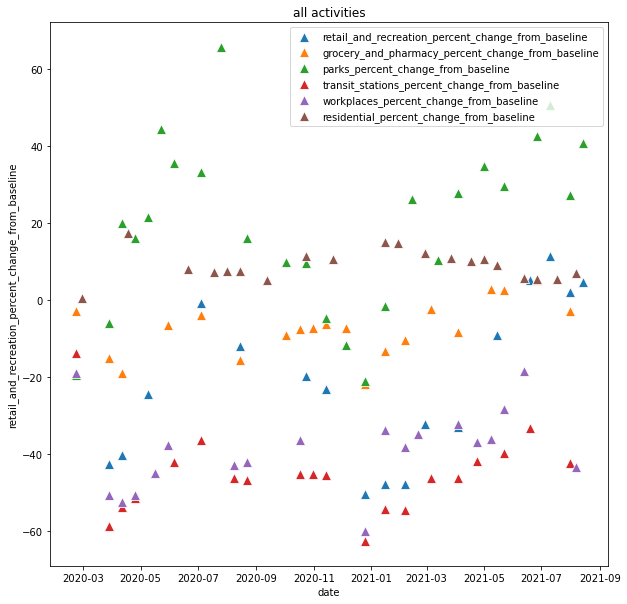

In [14]:
# YOUR CODE HERE
act_list=['retail_and_recreation_percent_change_from_baseline',
          'grocery_and_pharmacy_percent_change_from_baseline',
          'parks_percent_change_from_baseline',
          'transit_stations_percent_change_from_baseline',
          'workplaces_percent_change_from_baseline',
          'residential_percent_change_from_baseline']
fig, ax = plt.subplots(figsize=(10,10))
# set the title of the plot
ax.set_title('all activities')#plot for all 6 activities
# plot the daily values
# plot the 7-day average


for acts in act_list:
    pks=fpv_data(df_province_agg,acts,'valley')
    df_max_dates=[]
    df_max=[]
    for i in range(len(df_province_agg[acts])):
        if i in pks:
            df_max_dates.append(df_province_agg['date'][i])
            df_max.append(df_province_agg[acts][i])
    df_datamax=pd.DataFrame({'date':df_max_dates,acts:df_max})
    sns.scatterplot(x=df_datamax['date'], y=df_datamax[acts], data=df_datamax, label=acts, ax=ax, marker='^', s=100)
    #vls=fpv_data(df_province_agg,acts,'valley')
    print(pks)
plt.show()

### 8. Is there any common dates (or periods) among these peaks (and/or valleys) of different activities

*Food for thoughts*:
- One of the most naive way to find the overlapping dates is to look for common indexes (or dates) of the peaks/valleys
- A more general solution is to have a tolerance level between the days. For example, Sep 19 and Sep 20 can be considered matched (or overlapped) if the tolerance level is at least one day.

In [34]:
# YOUR CODE HERE
date_num={}
for alldate in df_U['date']:
    date_num[str(alldate)[:10]]=0 #an empty dict with all days
for acts in act_list:
    pks=fpv_data(df_province_agg,acts,'peak')
    df_max_dates=[]
    for i in range(len(df_province_agg[acts])):
        if i in pks:
            df_max_dates.append(df_province_agg['date'][i]) #find how many peaks are there in every single days   
    for dates in df_max_dates:
        date_num[str(dates)[:10]]+=1 #add the peaks into every day
#print(date_num)
for keys in date_num:#checking a 1-day tolerance for dates
    if int(keys[8:10])<=27 and int(keys[8:10])>=9:
        tkeys=str(keys[:8])+str(int(keys[8:10])+1)#tomorrow keys
        if date_num[keys]+date_num[tkeys]>=4:#days with more peaks
            print(keys+','+tkeys+':'+str(date_num[keys]+date_num[tkeys]))
    elif int(keys[8:10])<9:
        tkeys=str(keys[:9])+str(int(keys[9])+1)
        if date_num[keys]+date_num[tkeys]>=4:#days with more peaks
            print(keys+','+tkeys+':'+str(date_num[keys]+date_num[tkeys]))
    #KeyError raises due to end of dict
    

2020-04-03,2020-04-04:5
2020-04-04,2020-04-05:5
2020-06-26,2020-06-27:4
2020-06-27,2020-06-28:4
2020-11-06,2020-11-07:4
2020-11-07,2020-11-08:4
2021-01-08,2021-01-09:5
2021-01-09,2021-01-10:5
2021-02-19,2021-02-20:4
2021-02-20,2021-02-21:4
2021-04-16,2021-04-17:4
2021-04-17,2021-04-18:4


KeyError: '2021-09-02'

## OPTIONAL

Append population/density for provinces/municipalities to the dataframe. The data for Netherlands is available [here](https://www.cbs.nl/en-gb/news/2021/30/population-growth-picks-up-again)


In [ ]:
# YOUR CODE HERE
#I didn't find where is population by provinces, but try to show it
#1: find initial population for each province, the baseline
#2: cauculate product between initial populaton and 'residential_percent_change_from_baseline'
#3: create a new column named 'population' for dataframe, to save population data
#4: fill this value into referred date in the new created column 'population'